# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** W

**Names:**

* Olivier Cloux
* Thibault Urien
* Saskia Reiss

---

#### Instructions

*This is a template for part 1 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.1 Exploration of real networks

#### Exercise 2.1

In [1]:
# need to import a few things
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Part 1 : read the given file into a list
graph1 = nx.read_edgelist('../data/network1.csv', delimiter=',', nodetype=int, encoding="utf-8")

In [ ]:
# Part 2 : Compute the number of edges and nodes in the graph.
print("Number of nodes :")
print(len(graph1.nodes()))
print("Number of edges :")
print(len(graph1.edges()))

#### Exercise 2.2:  Node degree distribution

In [3]:
# helper function
def plot_degree_distribution(G):
    degs = {}
    for n in G.nodes():
        deg = G.degree(n)
        if deg not in degs:
            degs[deg] = 0;
        degs[deg] += 1
    return degs

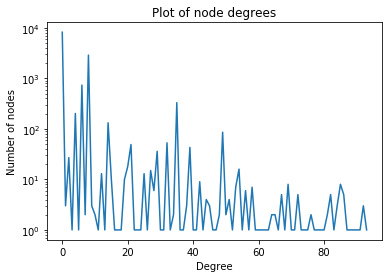

In [13]:
# compute the node degree distribution
degree_list = plot_degree_distribution(graph1)
plt.plot(list(degree_list.values()), histtype='step', cumulative=True)
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title(r'Plot of node degrees')
plt.show()

##### The Plot
The plot we choose to show the node degree distribution is a log plot, because there are a lot of nodes and thus maks a graph hard to read without a log scale (as it becomes exponential). We also did a cumulative distribution, to be able to see properties of the degree distribution more clearly.

##### Properties of the Degree Distribution


#### Exercise 2.3: Giant component

#### Exercise 2.4: Short paths & Small-worlds

#### Exercise 2.5: Network comparison

#### Exercise 2.6: Network identification